<a href="https://colab.research.google.com/github/daanishrasheed/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-02 19:17:31--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.25.14
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.25.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.7MB/s    in 13s     

2019-10-02 19:17:45 (14.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

[Errno 2] No such file or directory: 'instacart_2017_05_01'
/content/instacart_2017_05_01/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [0]:
import pandas as pd

### aisles

In [0]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


We don't need anything from aisles.csv

### departments

In [0]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol




### order_products__prior

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
display(example)

We need:
- order id
- product id
- add to cart order

### order_products__train

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### orders

In [0]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


- order id
- user id
- order number
- order dow
- order hour of day

### products

In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


- product id
- product main

## Concatenate order_products__prior and order_products__train

In [0]:
order_products__prior.shape

(32434489, 4)

In [0]:
order_products__train.shape

(1384617, 4)

In [0]:
#Give the function a list of dataframe to concatenate

order_products = pd.concat([order_products__prior, order_products__train])


print(order_products.shape)
order_products.head(50)

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [0]:
assert 1 == 1

In [0]:
#assert 1 == 0

In [0]:
assert (order_products__prior.shape[0] + order_products__train.shape[0] == order_products.shape[0])

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [0]:
display(example)

In [0]:
(order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1384587    False
1384588    False
1384589    False
1384590    False
1384591    False
1384592    False
1384593    False
1384594    False
1384595    False
1384596    False
1384597    False
1384598    False
1384599    False
1384600    False
1384601    False
1384602    False
1384603    False
1384604    False
1384605    False
1384606    False
1384607    False
1384608    False
1384609    False
1384610    False
1384611    False
1384612    False
1384613    False
1384614    Fal

In [0]:
order_products[(order_products['order_id']==2539329) | (order_products['order_id'] == 2398795)].head(20)

,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


In [0]:
orders[orders['user_id'] == 1][orders['order_number'] <= 2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [0]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)

In [0]:
columns = ['user_id',
           'order_id',
           'order_number',
           'order_dow',
           'order_hour_of_day']

In [0]:
orders_subset = orders.loc[condition, columns]

orders_subset.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [0]:
condition = (order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)

In [0]:
columns = ['order_id', 'add_to_cart_order', 'product_id']

In [0]:
order_products_subset = order_products.loc[condition, columns]
order_products_subset.head(20)

,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088
22742749,2398795,6,13032
24076664,2539329,1,196
24076665,2539329,2,14084
24076666,2539329,3,12427
24076667,2539329,4,26088


Merge with columns from `products`

In [0]:
merged = pd.merge(orders_subset, order_products_subset, how='inner', on='order_id')

merged.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405


In [0]:
display(example)

In [0]:
final = pd.merge(merged, products[['product_id', 'product_name']], how = 'inner', on = 'product_id')
final.head(11)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [0]:
display(example)

In [0]:
final = final.sort_values(by = ['order_number', 'add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
final.columns = [column.replace('_', ' ') for column in final]
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
display(example)

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [0]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [0]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy = tidy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy.trt = tidy.trt.str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Table 2 --> Tidy

In [115]:
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [116]:
table2.index.tolist()

['treatmenta', 'treatmentb']

In [120]:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [122]:
t = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
t

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [0]:
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [124]:
wide1 = t.pivot_table(index='index', columns='variable', values='value')
wide1

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [0]:
import seaborn as sns

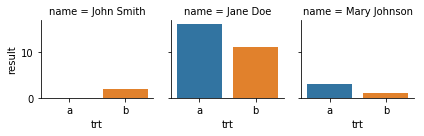

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);



## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
product_names = ['Half baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [0]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id', 'order_hour_of_day']]))

merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | (merged['product_name']=='Half And Half Ultra Pasteurized'))

merged = merged[condition]

print(merged.shape)
merged.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [0]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

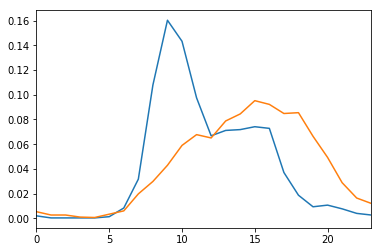

In [0]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

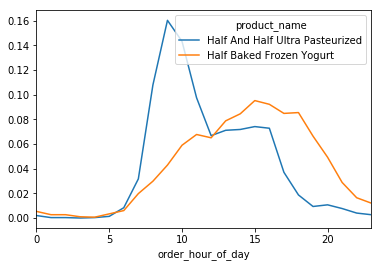

In [0]:
pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], normalize = 'columns').plot()

### 3. Pivot Table

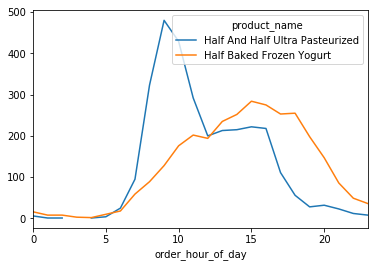

In [0]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', 
                   values='order_id', aggfunc=len).plot()

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [0]:
table.reset_index().melt(id_vars = 'order_hour_of_day', )

,order_hour_of_day,product_name,value
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294
